In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Sioux_multi_class

In [2]:
numNodes = Compute_Jacobian_Sioux_multi_class.numNodes;
numLinks = Compute_Jacobian_Sioux_multi_class.numLinks;
numODpairs = Compute_Jacobian_Sioux_multi_class.numODpairs;
od_pairs = Compute_Jacobian_Sioux_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Sioux_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Sioux_multi_class.link_length_list;

In [3]:
include("prepare_data_Sioux.jl");
include("extract_data_Sioux.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
include("../Julia_files/initia_data.jl");

In [5]:
demandsDictCar[0] = demandsDict[0]["car"]
demandsDictCar[1] = demandsDict[1]["car"]
demandsDictTruck[0] = demandsDict[0]["truck"]
demandsDictTruck[1] = demandsDict[1]["truck"]

Dict{Any,Any} with 576 entries:
  (23,8)  => 63.37528707496263
  (8,23)  => 59.79086933302354
  (6,9)   => 84.90657056467408
  (18,3)  => 0.0
  (21,13) => 140.29991551978466
  (22,16) => 228.41173858767786
  (15,17) => 245.7339370451216
  (22,14) => 279.7212798606292
  (13,9)  => 107.79492026266783
  (23,10) => 321.22719805190104
  (24,22) => 255.741678587741
  (8,9)   => 186.79212680516096
  (9,1)   => 106.91060505799108
  (17,14) => 150.9059449930511
  (16,6)  => 214.14063007232122
  (16,12) => 113.81816081179903
  (16,13) => 122.26223791537953
  (22,2)  => 16.27732554839381
  (24,3)  => 0.0
  (7,16)  => 279.7371708349173
  (1,12)  => 43.04076127832201
  (4,5)   => 81.07590399787179
  (11,8)  => 131.99561420493998
  (18,21) => 22.962131259660783
  (19,4)  => 40.04888555380761
  ⋮       => ⋮

In [6]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0] ));

In [7]:
demandsDict

Dict{Any,Any} with 2 entries:
  0 => {"car"=>{(23,8)=>240.0,(8,23)=>240.0,(6,9)=>320.0,(18,3)=>0.0,(21,13)=>4…
  1 => {"car"=>{(23,8)=>253.5011482998505,(8,23)=>239.16347733209415,(6,9)=>339…

In [8]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [9]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [80.0,80.0,400.0,160.0,240.0,400.0,640.0,400.0,1040.0,400.0,160.0,400.0,…

In [10]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [20.0,20.0,100.0,40.0,60.0,100.0,160.0,100.0,260.0,100.0,40.0,100.0,60.0…

In [11]:
fcoeffs = [1, 0, 0, 0, .15];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [12]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => [(15,19)=>14759.920000000011,(20,21)=>5083.680000000003,(22,20)=>5…
  "truck" => [(15,19)=>3813.999999999998,(20,21)=>1260.9200000000012,(22,20)=>1…

In [13]:
tapFlowVecDict[0]

2x76 Array{Float64,2}:
 4967.28  7874.96  4993.52  4801.6   …  5775.28  8412.64  8266.0   5744.48
 1169.66  1893.72  1173.44  1128.44     1709.74  2117.6   1822.12  1695.02

In [14]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[0]);

In [15]:
arcsDict[0]

Dict{(Int64,Int64),Arc} with 76 entries:
  (15,19) => Arc(15,19,14564.75315,3.0,22387.920000000006,14759.920000000011,38…
  (20,21) => Arc(20,21,5059.91234,6.0,7605.520000000006,5083.680000000003,1260.…
  (22,20) => Arc(22,20,5075.697193,5.0,8415.919999999991,5622.639999999992,1396…
  (23,22) => Arc(23,22,5000.0,4.0,11239.719999999998,7425.680000000002,1907.019…
  (10,11) => Arc(10,11,10000.0,5.0,20994.72000000001,14105.520000000008,3444.6)
  (8,9)   => Arc(8,9,5050.193156,10.0,8780.080000000002,5785.680000000003,1497.…
  (13,12) => Arc(13,12,25900.20064,3.0,17389.079999999998,11640.55999999999,287…
  (24,21) => Arc(24,21,4885.357564,3.0,11910.240000000007,8266.000000000007,182…
  (3,1)   => Arc(3,1,23403.47319,4.0,11628.600000000002,7848.719999999998,1889.…
  (19,17) => Arc(19,17,4823.950831,2.0,10807.519999999999,7355.519999999999,172…
  (4,5)   => Arc(4,5,17782.7941,2.0,23040.999999999993,15148.639999999996,3946.…
  (17,16) => Arc(17,16,5229.910063,2.0,13142.87999999998,8931.0399999

In [16]:
deg = 7
c = 1.5
lam = 1e2

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

INFO: Loading help data...


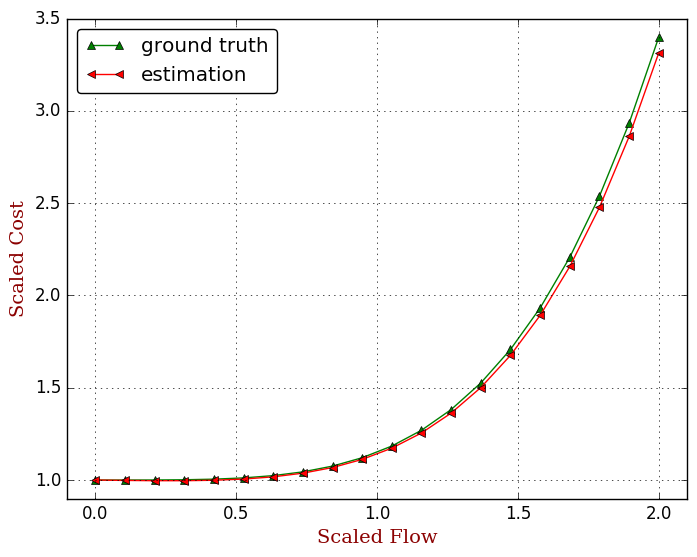

In [17]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

In [18]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [19]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [20]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => [(15,19)=>14614.479537713243,(20,21)=>5015.714856202909,(22,20)=>53…
  "truck" => [(15,19)=>3802.422100441352,(20,21)=>1264.9762345122606,(22,20)=>13…

In [21]:
tapFlowVecDict[1] 

2x76 Array{Float64,2}:
 4899.77  7583.05  4684.54  4831.34  …  5726.61  8188.66  8196.33  5797.68
 1191.26  1916.1   1191.26  1172.6      1711.14  2049.41  1746.19  1748.09

In [22]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[1]);

In [23]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [24]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 76 entries:
  "32" => 17.127766751171876
  "29" => 22.400922349970845
  "1"  => 4.009245835829087
  "54" => 3.753587489887706
  "2"  => 6.0
  "74" => 17.3143890670303
  "41" => 13.456415958206854
  "65" => 18.625900624473687
  "51" => 14.87383125866727
  "53" => 2.1472022155783503
  "27" => 21.931801005017412
  "75" => 5.234727933129414
  "42" => 20.46171862807784
  "33" => 20.949080144492516
  "28" => 33.51888463176874
  "50" => 31.90661052161768
  "52" => 10.097205785825947
  "63" => 10.003043100245579
  "26" => 19.040372437516627
  "10" => 2.759013238109859
  "24" => 8.521699866294696
  "58" => 14.636517255766721
  "25" => 8.498887710943535
  "23" => 22.899533453961688
  "49" => 3.6059141837210555
  ⋮     => ⋮

In [25]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 76 entries:
  "32" => 18.840543426289067
  "29" => 24.64101458496793
  "1"  => 4.410170419411996
  "54" => 4.128946238876477
  "2"  => 6.6000000000000005
  "74" => 19.045827973733335
  "41" => 14.80205755402754
  "65" => 20.488490686921057
  "51" => 16.361214384533998
  "53" => 2.3619224371361858
  "27" => 24.124981105519154
  "75" => 5.758200726442356
  "42" => 22.507890490885625
  "33" => 23.04398815894177
  "28" => 36.87077309494562
  "50" => 35.09727157377945
  "52" => 11.106926364408542
  "63" => 11.003347410270138
  "26" => 20.94440968126829
  "10" => 3.034914561920845
  "24" => 9.373869852924166
  "58" => 16.100168981343394
  "25" => 9.34877648203789
  "23" => 25.18948679935786
  "49" => 3.9665056020931613
  ⋮     => ⋮

In [26]:
link_length_list

76-element Array{Any,1}:
 6.0
 4.0
 6.0
 5.0
 4.0
 4.0
 4.0
 4.0
 2.0
 6.0
 2.0
 4.0
 5.0
 ⋮  
 2.0
 3.0
 3.0
 5.0
 2.0
 4.0
 4.0
 4.0
 2.0
 4.0
 3.0
 2.0

In [27]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => {6.0,4.009245835829087,6.0,8.141337280954707,4.01808002223934,4.985432967…
  1 => {6.6000000000000005,4.410170419411996,6.6000000000000005,8.95547100905017…

In [28]:
jacobiSpiessDict[1] = Compute_Jacobian_Sioux_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [29]:
jacobiSpiessDict[1]

552x76x2 Array{Float64,3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0 

In [30]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [31]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
    
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Sioux_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [32]:
demandsVecDictCar

Dict{Any,Any} with 5 entries:
  0 => [80.0,80.0,400.0,160.0,240.0,400.0,640.0,400.0,1040.0,400.0,160.0,400.0,2…
  4 => [71.6370076500527,71.31285669325763,467.01696169081174,178.6813611269627,…
  2 => [71.63703740890902,71.31286506840686,467.01693497088206,178.6811367064055…
  3 => [71.6370076500527,71.31285669325763,467.01696169081174,178.6813611269627,…
  1 => [70.98068992808098,68.4749934064108,462.97583264750983,171.47677234265936…

In [33]:
demandsVecDictTruck

Dict{Any,Any} with 5 entries:
  0 => [20.0,20.0,100.0,40.0,60.0,100.0,160.0,100.0,260.0,100.0,40.0,100.0,60.0,…
  4 => [17.535138344135063,16.901102461674732,115.88272948944639,45.206319389695…
  2 => [17.535165020045707,16.901159868066493,115.88284108503599,45.206371948720…
  3 => [17.535138344135063,16.901102461674732,115.88272948944639,45.206319389695…
  1 => [17.745172482020244,17.1187483516027,115.74395816187746,42.86919308566484…

In [34]:
norObjFunDict

Dict{Any,Any} with 4 entries:
  4 => 0.6163449966352078
  2 => 0.6709741374255802
  3 => 0.6163449966352078
  1 => 1.0

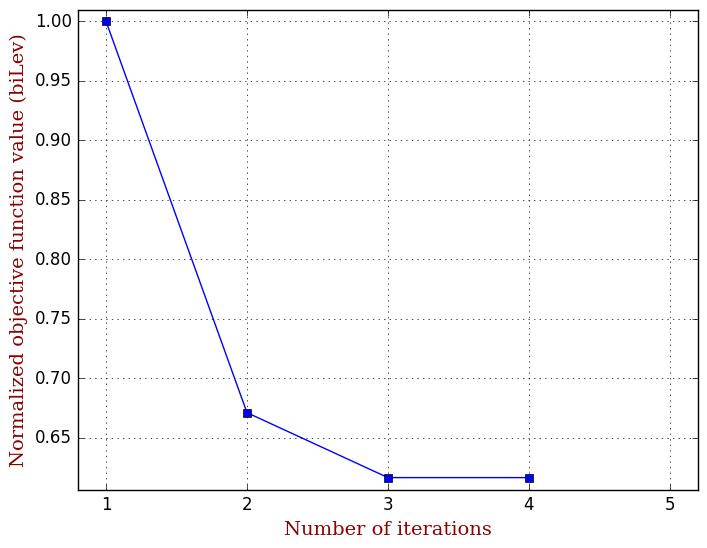

In [35]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Sioux.pdf")

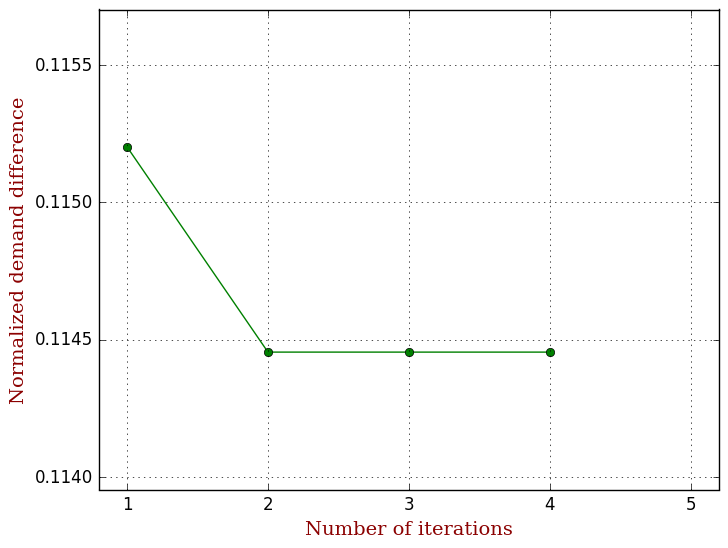

In [36]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Sioux_car.pdf")

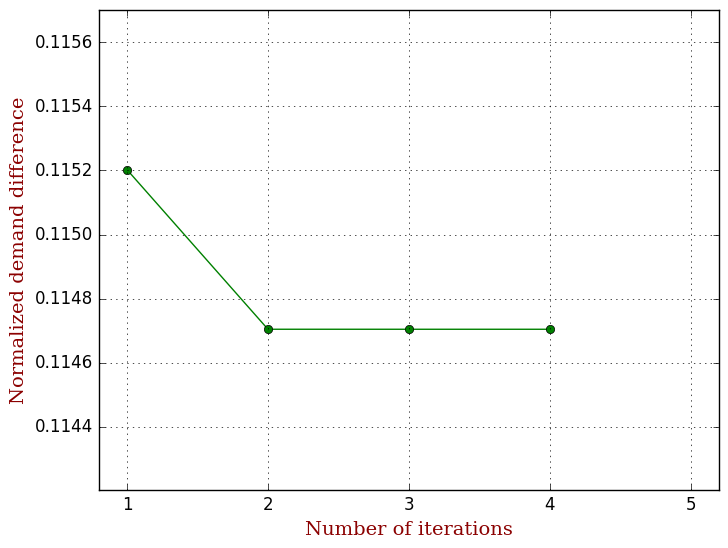

In [37]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Sioux_truck.pdf")

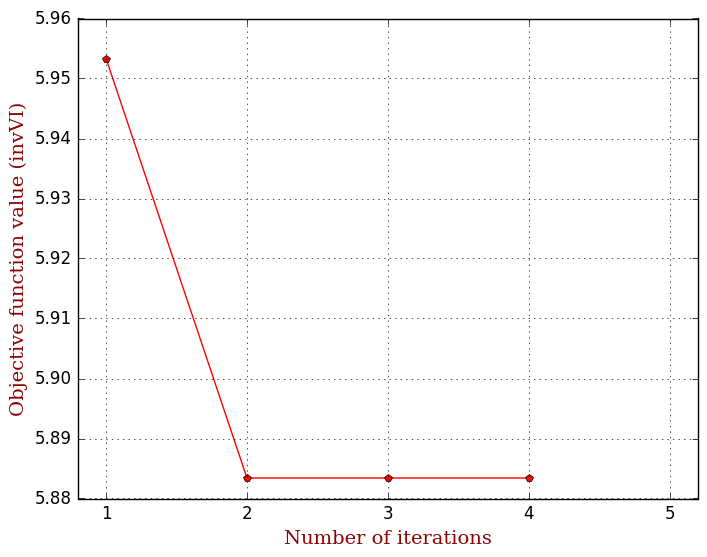

In [38]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# plot(iterNum, objFun, "s-g", label="True")

plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Sioux.pdf")

In [39]:
coeffs_dict

Dict{Any,Any} with 4 entries:
  (7,1.5,100.0,1) => [1.0,-0.020841611786788446,0.0028086101249366804,0.05987489…
  (7,1.5,100.0,3) => [1.0,-0.01241240324155924,0.006759085570748935,0.0610075348…
  (7,1.5,100.0,4) => [1.0,-0.01241240324155924,0.006759085570748935,0.0610075348…
  (7,1.5,100.0,2) => [1.0,-0.012412250365214565,0.00675912692876729,0.0610074780…

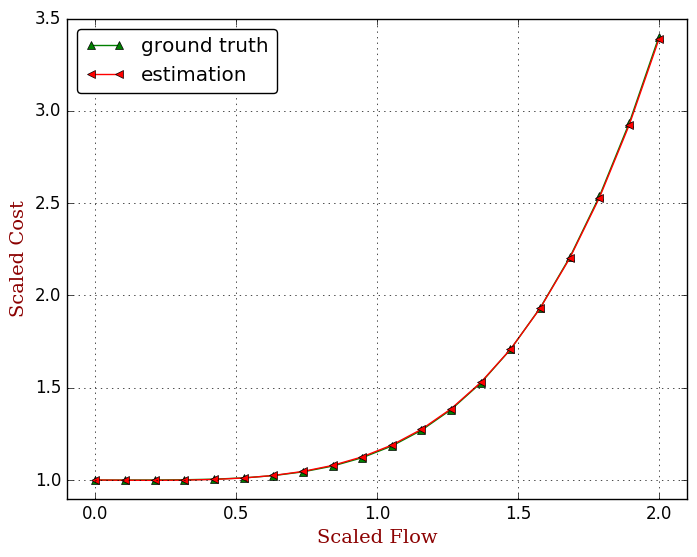

In [40]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

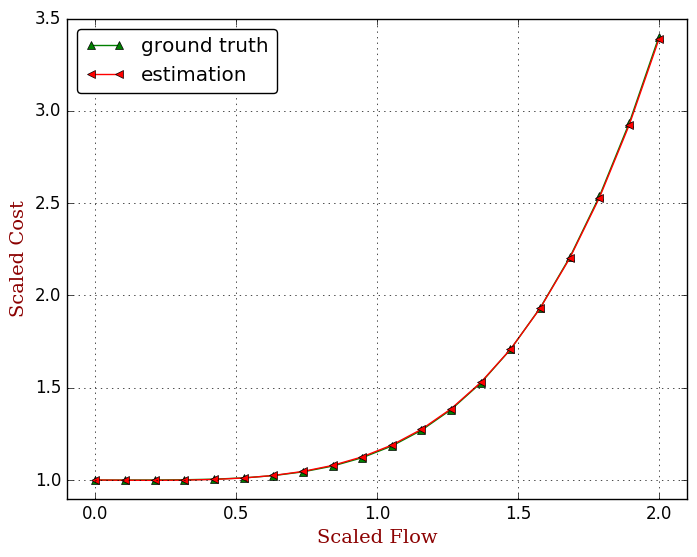

In [41]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

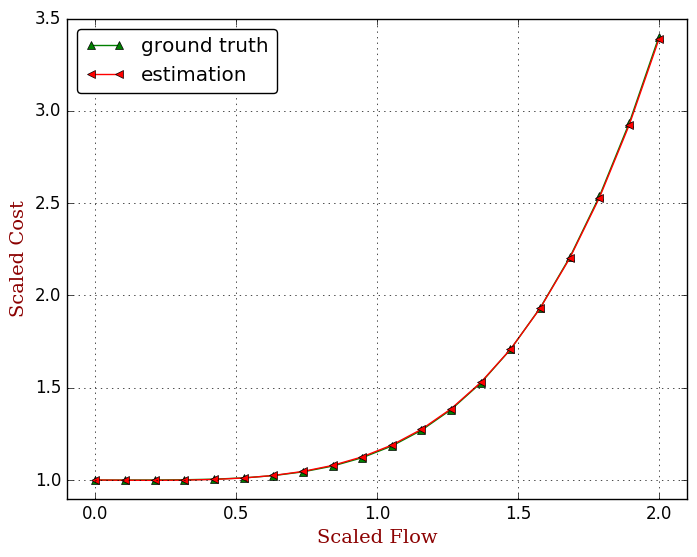

In [42]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "^-g", label="ground truth")
plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = ["family"=>"serif", "color"=>"darkred", "weight"=>"normal", "size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

In [43]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [45]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [46]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [47]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [49]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [50]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [51]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [52]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [53]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)